In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pre-processamento
from sklearn.preprocessing import LabelEncoder

# modelo
from sklearn.linear_model import LogisticRegression

In [15]:
#leitura de dados csv
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [16]:
# extração de x e y
x, y = df[['temperatura']].values, df[['classification']].values
print("x:\n", x)
print("y:\n", y)

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [17]:
# conversão de y para valores númericos
le = LabelEncoder() # converte valores categoricos em valores núméricos
y = le.fit_transform(y.ravel()) # aplica a transformação e retorna um array
print("y:\n", y)

y:
 [3 2 3 3 0 1]


In [20]:
# classificador
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression()

In [21]:
# gerando 100 valores de temperatura
# linearmente espaçosos entre 0 e 45
# predição em novos valores de temperatura
x_test = np.linspace(start=0., stop=45, num=100).reshape(-1, 1)

#predição desses valores
y_pred = clf.predict(x_test)

In [22]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [23]:
# conversão de y_pred para os valores originais
y_pred = le.inverse_transform(y_pred)
print(y_pred)

['frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'confortavel' 'confortavel' 'confortavel' 'confortavel' 'confortavel'
 'confortavel' 'quente' 'quente' 'quente' 'quente' 'quente' 'quente'
 'quente' 'quente' 'quente' 'quente' 'quente' 'quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito 

In [24]:
# output
output = {'new_temp': x_test.ravel(),
          'new_class': y_pred.ravel()}
output = pd.DataFrame(output)

In [25]:
# estatisticas
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [26]:
# estatisticas
output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


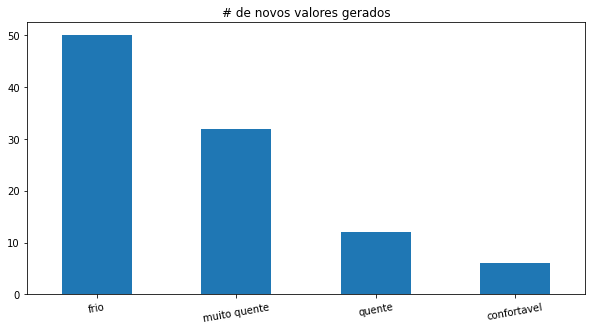

In [28]:
# contagem de valores gerados
output['new_class'].value_counts().plot.bar(figsize=(10,5),
                                            rot=10,
                                            title='# de novos valores gerados');

In [29]:
# sistema automático
def classify_temp():
  """Classifica o input do usuário"""

  ask = True
  while ask: 
    # input de temperatura
    temp = input('Insira a temperatura (graus Celsius): ')

    # transformar para numpy array
    temp = np.array(float(temp)).reshape(-1, 1)

    # realiza classificado
    class_temp = clf.predict(temp)

    # transformação inversa para retornar a string original
    class_temp = le.inverse_transform(class_temp)

    # classificação
    print(f"A classificação da temperatura: {temp.ravel()[0]}", class_temp[0])

    # perguntar
    ask = input(f"Nova classificação (y/n): ") == 'y'

In [30]:
# chamando a função
classify_temp()

Insira a temperatura (graus Celsius): 15
A classificação da temperatura: 15.0 frio
Nova classificação (y/n): y
Insira a temperatura (graus Celsius): 45
A classificação da temperatura: 45.0 muito quente
Nova classificação (y/n): n
